In [ ]:
pip install geofeather

In [ ]:
pip install geopandas


In [ ]:
!pip install rtree

In [ ]:
!pip install pygeos

In [ ]:
#Installing Shapley. Shapley can help us find how many addresses are in each parcel via Point (addresses) in Polygon (parcel)
from shapely.geometry import Point, Polygon
from geofeather import to_geofeather, from_geofeather
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# statewide adress data
state_wide_address = from_geofeather('/content/drive/MyDrive/506 Google Colab/data/statewide_address_data.feather')

In [ ]:
#state_wide_parcels = from_geofeather('/content/drive/MyDrive/506 Google Colab/data/ParcelData/statewide_parcel_data.feather')

In [ ]:
state_wide_parcels = from_geofeather('/content/drive/MyDrive/506 Google Colab/data/l3_taxpar_poly_assess.feather')

/usr/local/lib/python3.7/dist-packages/geofeather/core.py:70: UserWarning: /content/drive/MyDrive/506 Google Colab/data/l3_taxpar_poly_assess.feather.crs coordinate reference system file is missing. No crs will be set for this GeoDataFrame.
  crsfilename


In [ ]:
#Isolate quincy addresses
quincy_addresses = state_wide_address[state_wide_address['COMMUNITY_NAME']=='QUINCY']
quincy_addresses

,CENTROID_ID,FULL_NUMBER_STANDARDIZED,ADDRESS_NUMBER_PREFIX,ADDRESS_NUMBER,ADDRESS_NUMBER_SUFFIX,ADDRESS_NUMBER_2_PREFIX,ADDRESS_NUMBER_2,ADDRESS_NUMBER_2_SUFFIX,STREET_NAME,FLOOR,UNIT,MASTER_ADDRESS_ID,STREET_NAME_ID,REL_LOC,SITE_ID,BUILDING_NAME,GEOGRAPHIC_TOWN_ID,COMMUNITY_ID,COMMUNITY_NAME,GEOGRAPHIC_TOWN,POSTCODE,PC_NAME,COUNTY,STATE,geometry
2065620,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,407,4049169,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775)
2065621,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,203,4048730,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775)
2065622,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,308,4049154,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775)
2065623,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,410,4049172,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775)
2065646,M_238821_886625,826,None,826.0,None,None,NaN,None,WILLARD STREET,None,420,4049724,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238821.324 886625.242)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325425,M_240360_894698,4,None,4.0,None,None,NaN,None,STANDISH ROAD,None,None,4018500,180418,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240359.890 894697.594)
2327432,M_240264_894802,16,None,16.0,None,None,NaN,None,MOON ISLAND ROAD,None,None,4016457,179445,None,NaN,STEP ONE EARLY INTERVENTION PROGRAM,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240263.999 894802.252)
2328705,M_240384_894699,24,None,24.0,None,None,NaN,None,SHEPARD STREET,None,None,4014952,180385,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240384.318 894698.903)
2328719,M_240174_894716,151,None,151.0,None,None,NaN,None,DORCHESTER STREET,None,None,4016641,179760,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240173.761 894715.681)


In [ ]:
quincy_parcels = state_wide_parcels[state_wide_parcels['CITY']=='QUINCY']
quincy_parcels

,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,TOWN_ID,PROP_ID,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,CITY,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,NUM_ROOMS,LOT_UNITS,STORIES,SHAPE_AREA,SHAPE_LEN,geometry
207,5152-3-31,F_783249_2921137,FEE,5152,ASSESS,None,20110601,None,N,243,5152_3_31,392700,280600,17200,690500,2020,0.160354,20161012,609000,1040,121 PINE ST,121,PINE ST,None,QUINCY,02171,SIEGMANN GLENN C,19 MAPLE ST,NORFOLK,MA,02056,None,34555,0060,None,RES A,1925,3848,0,2384,2 Fam Flat,12,Acres,2,656.140769,112.016923,"POLYGON ((238755.213 890370.282, 238735.706 89..."
379,2040-21-67,F_793477_2916121,FEE,2040,ASSESS,None,20110601,None,N,243,2040_21_67,26600,136500,2500,165600,2020,0.094467,20060425,0,3320,13 LANCASTER ST,13,LANCASTER ST,None,QUINCY,02171,LANCASTER LLC,15 LANCASTER ST,QUINCY,MA,02169,None,23604,0590,None,RES B,1940,792,0,792,Warehouse,0,Acres,1,388.493215,80.843681,"POLYGON ((241865.666 888840.945, 241851.359 88..."
528,1044-22-2,F_803778_2922018,FEE,1044,ASSESS,None,20110601,None,N,243,1044_22_2,118700,170100,0,288800,2020,0.127158,20151215,289900,1010,103 ROCK ISLAND RD,103,ROCK ISLAND RD,None,QUINCY,02171,ONOFRIO SARAH,103 ROCK ISLAND RD,QUINCY,MA,02169,None,33719,0389,None,RES A,1907,1876,0,952,Bungalow,5,Acres,1,530.290255,97.544739,"POLYGON ((244976.727 890623.038, 244974.822 89..."
730,6080Z-23-109,F_787572_2932808,FEE,6080,ASSESS,None,20110601,None,N,243,6080Z_23_109,336400,307900,5600,649900,2020,0.175620,20120601,0,1010,11 ABERDEEN RD,11,ABERDEEN RD,None,QUINCY,02171,AYERS CHARLES W,11 ABERDEEN RD,QUINCY,MA,02171,None,1254,0200,None,RESA,1953,3311,0,2188,Colonial,8,Acres,2,714.122257,106.982471,"POLYGON ((240044.514 893904.538, 240044.467 89..."
735,6033-23-63,F_784341_2926274,FEE,6033,ASSESS,None,20110601,None,N,243,6033_23_63,381300,251000,5400,637700,2020,0.114784,20131021,500000,1040,215 NEWBURY AVE,215,NEWBURY AVE,None,QUINCY,02171,ZOU JIN XIN,215 NEWBURY AVE,QUINCY,MA,02171,None,31837,0154,None,RES B,1925,4091,0,2280,2 Fam Flat,10,Acres,2,454.815895,90.269524,"POLYGON ((239084.569 891932.538, 239060.033 89..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406159,None,F_783389_2926662,TAX,6041,ASSESS,None,20110601,None,N,243,6041_57_3,392700,464900,12400,870000,2020,0.429293,19680409,0,934C,12 HUNT ST,12,HUNT ST,None,QUINCY,02171,QUINCY CITY OF,1305 HANCOCK ST,QUINCY,MA,02169,None,04753,0294,None,BUS B,1974,4531,0,4499,Clubs/Lodges,3,Acres,1,1704.850478,174.103519,"POLYGON ((238797.104 892027.254, 238788.437 89..."
2406223,1187-17-2,F_787810_2916458,FEE,1187,ASSESS,None,20110601,None,N,243,1187_17_2,439400,191400,0,630800,2020,0.119353,20170123,0,1040,131 WHITWELL ST,131,WHITWELL ST,None,QUINCY,02171,STAFFORD DANIEL,131 WHITWELL ST,QUINCY,MA,02169,None,34862,0173,None,RES B,1902,4759,0,2738,2 Fam Flat,8,Acres,2.5,455.248202,88.004117,"POLYGON ((240129.845 888922.555, 240114.224 88..."
2406347,None,F_791233_2916034,TAX,1142,ASSESS,None,20110601,None,N,243,1142_35_A,1957700,283500,613700,2854900,2020,0.181772,19971022,1275000,3400,15 COTTAGE AVE,15,COTTAGE AVE,None,QUINCY,02171,BRISBANE LLC,15-19 COTTAGE AVE,QUINCY,MA,02169,None,12045,0742,None,QCZD-15,1987,35352,0,31239,Office Bldg,10,Acres,5,759.783035,115.902150,"POLYGON ((241176.892 888803.607, 241170.701 88..."
2406349,6081A-23-D,F_789080_2932805,FEE,6081,ASSESS,None,20110601,None,N,243,6081A_23_D,181800,285500,0,467300,2020,0.141414,20060501,0,1010,237 BELLEVUE RD,237,BELLEVUE RD,None,QUINCY,02171,LYNCH BARBARA A,101 ABERDEEM RD,QUINCY,MA,02171,None,1100,0977,None,RES A,1950,2420,0,1344,Cape Cod,6,Acres,1.75,561.127703,98.068155,"POLYGON ((240496.977 893914.199, 240496.025 89..."


In [ ]:
#Uploading Quincy parcel data (not a feather file)
quincy_parcels_single = gpd.read_file('/content/drive/MyDrive/506 Google Colab/data/L3_SHP_M243_Quincy/M243TaxPar.shp')
quincy_parcels_single
#quincy_parcels["geometry"][0]

,SHAPE_Leng,SHAPE_Area,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,TOWN_ID,geometry
0,738.412609,18187.263103,1047A-1-,F_805678_2921359,FEE,1047,ASSESS,None,20110601,None,N,243,"POLYGON ((245631.381 890483.668, 245631.496 89..."
1,143.577378,647.840540,None,F_805145_2925305,TAX,1005,ASSESS,None,20110601,None,N,243,"POLYGON ((245404.858 891623.698, 245370.930 89..."
2,136.319900,904.828174,None,F_805105_2925239,TAX,1005,ASSESS,None,20110601,None,N,243,"POLYGON ((245421.888 891613.183, 245421.222 89..."
3,136.003189,905.595151,None,F_805103_2925125,TAX,1005,ASSESS,None,20110601,None,N,243,"POLYGON ((245417.145 891568.529, 245417.145 89..."
4,131.655335,813.090252,None,F_805102_2925183,TAX,1005,ASSESS,None,20110601,None,N,243,"POLYGON ((245419.812 891592.380, 245419.241 89..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21278,313.884035,5239.895750,1177A-106-1,F_787443_2916927,FEE,1177,SUBDIV,None,20191118,None,N,243,"POLYGON ((240066.752 889096.245, 240052.613 88..."
21279,629.482372,14065.327822,1177A-110-5,F_788106_2916853,FEE,1177,SUBDIV,None,20191118,None,N,243,"POLYGON ((240277.388 889163.652, 240274.092 88..."
21280,133.059876,1149.149129,None,F_782440_2928283,TAX,6074,ASSESS,None,20200113,None,N,243,"POLYGON ((238491.847 892525.603, 238481.845 89..."
21281,252.396065,1918.845741,None,F_790656_2915640,FEE,1148,ASSESS,None,20110601,None,N,243,"POLYGON ((240985.687 888746.076, 240986.201 88..."


In [ ]:
print(quincy_addresses.columns.values)
print(quincy_parcels.columns.values)

['CENTROID_ID' 'FULL_NUMBER_STANDARDIZED' 'ADDRESS_NUMBER_PREFIX'
 'ADDRESS_NUMBER' 'ADDRESS_NUMBER_SUFFIX' 'ADDRESS_NUMBER_2_PREFIX'
 'ADDRESS_NUMBER_2' 'ADDRESS_NUMBER_2_SUFFIX' 'STREET_NAME' 'FLOOR' 'UNIT'
 'MASTER_ADDRESS_ID' 'STREET_NAME_ID' 'REL_LOC' 'SITE_ID' 'BUILDING_NAME'
 'GEOGRAPHIC_TOWN_ID' 'COMMUNITY_ID' 'COMMUNITY_NAME' 'GEOGRAPHIC_TOWN'
 'POSTCODE' 'PC_NAME' 'COUNTY' 'STATE' 'geometry']
['SHAPE_Leng' 'SHAPE_Area' 'MAP_PAR_ID' 'LOC_ID' 'POLY_TYPE' 'MAP_NO'
 'SOURCE' 'PLAN_ID' 'LAST_EDIT' 'BND_CHK' 'NO_MATCH' 'TOWN_ID' 'geometry']


In [ ]:
print('number of parcels in Quincy:%d.'%len(quincy_parcels))
print('number of addresses in Quincy:%d.'%len(quincy_addresses))

number of parcels in Quincy:26537.
number of addresses in Quincy:56431.


In [ ]:
quincy_addresses.groupby(['GEOGRAPHIC_TOWN_ID']).count()

,CENTROID_ID,FULL_NUMBER_STANDARDIZED,ADDRESS_NUMBER_PREFIX,ADDRESS_NUMBER,ADDRESS_NUMBER_SUFFIX,ADDRESS_NUMBER_2_PREFIX,ADDRESS_NUMBER_2,ADDRESS_NUMBER_2_SUFFIX,STREET_NAME,FLOOR,UNIT,MASTER_ADDRESS_ID,STREET_NAME_ID,REL_LOC,SITE_ID,BUILDING_NAME,COMMUNITY_ID,COMMUNITY_NAME,GEOGRAPHIC_TOWN,POSTCODE,PC_NAME,COUNTY,STATE,geometry
GEOGRAPHIC_TOWN_ID,,,,,,,,,,,,,,,,,,,,,,,,
40.0,3,3,0,3,0,0,0,0,3,0,0,3,3,0,0,0,3,3,3,3,3,3,3,3
189.0,28,28,0,28,0,0,0,0,28,0,3,28,28,0,0,0,28,28,28,28,28,28,28,28
243.0,56400,56400,10,56400,259,0,0,0,56400,2,29869,56400,56400,13,8868,375,56400,56400,56400,56377,56377,56400,56400,56400


In [ ]:
quincy_parcels.groupby(['TOWN_ID']).count()

,SHAPE_Leng,SHAPE_Area,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,geometry
TOWN_ID,,,,,,,,,,,,
243,21283,21283,16405,21283,21283,21260,21283,1,21283,105,21283,21283


In [ ]:
quincy_addresses.groupby(['COMMUNITY_ID']).count()

,CENTROID_ID,FULL_NUMBER_STANDARDIZED,ADDRESS_NUMBER_PREFIX,ADDRESS_NUMBER,ADDRESS_NUMBER_SUFFIX,ADDRESS_NUMBER_2_PREFIX,ADDRESS_NUMBER_2,ADDRESS_NUMBER_2_SUFFIX,STREET_NAME,FLOOR,UNIT,MASTER_ADDRESS_ID,STREET_NAME_ID,REL_LOC,SITE_ID,BUILDING_NAME,GEOGRAPHIC_TOWN_ID,COMMUNITY_NAME,GEOGRAPHIC_TOWN,POSTCODE,PC_NAME,COUNTY,STATE,geometry
COMMUNITY_ID,,,,,,,,,,,,,,,,,,,,,,,,
261,56431,56431,10,56431,259,0,0,0,56431,2,29872,56431,56431,13,8868,375,56431,56431,56431,56408,56408,56431,56431,56431


In [ ]:
quincy_parcels[['LOC_ID', 'geometry']].groupby(['LOC_ID']).count()['geometry'].nlargest(100)

LOC_ID
F_784058_2934173    244
F_797031_2917248    203
F_795294_2912571    187
F_782809_2924895    186
F_783569_2929151    169
                   ... 
F_790136_2918978     14
F_779590_2914734     13
F_781966_2916773     13
F_783498_2909766     13
F_784624_2914461     13
Name: geometry, Length: 100, dtype: int64

In [ ]:
quincy_parcels[['LOC_ID', 'geometry']][quincy_parcels[['LOC_ID', 'geometry']]['LOC_ID']== 'F_784624_2914461']

,LOC_ID,geometry
118474,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
750768,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
753934,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
1071132,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
1384557,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
1387341,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
1700756,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
2017189,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
2017190,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."
2019946,F_784624_2914461,"POLYGON ((239199.936 888323.394, 239192.774 88..."


In [ ]:
quincy_parcels_drop = quincy_parcels.drop_duplicates(subset=['LOC_ID'])

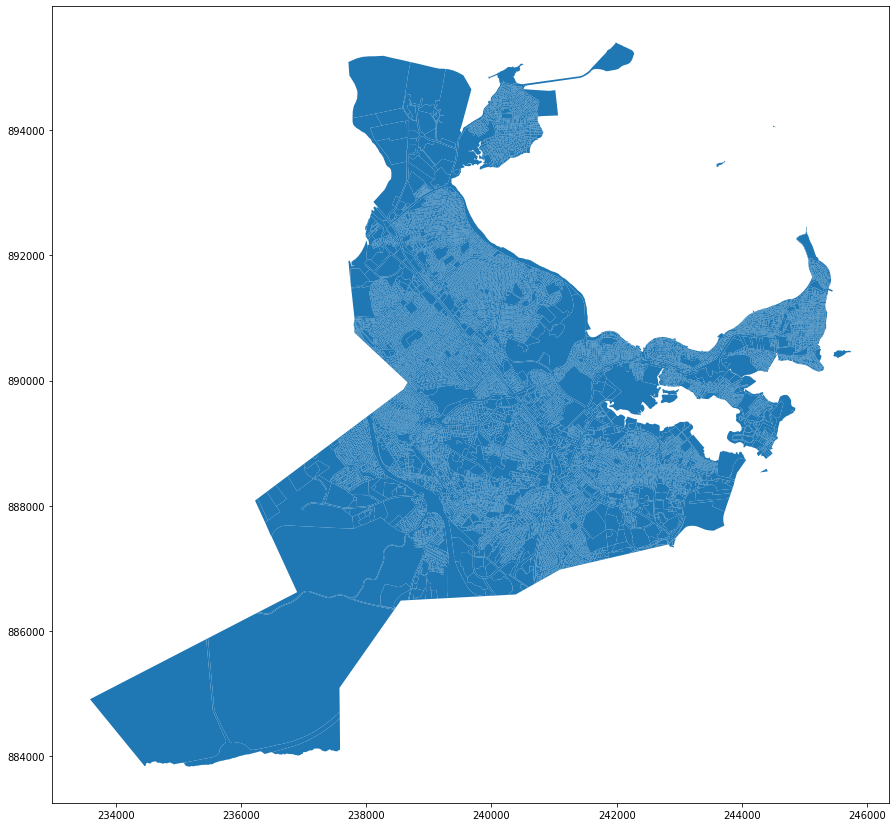

In [ ]:
f,ax = plt.subplots(1, figsize = (15,15))
ax = quincy_parcels_single[['LOC_ID', 'geometry']].plot(ax = ax)
plt.show()

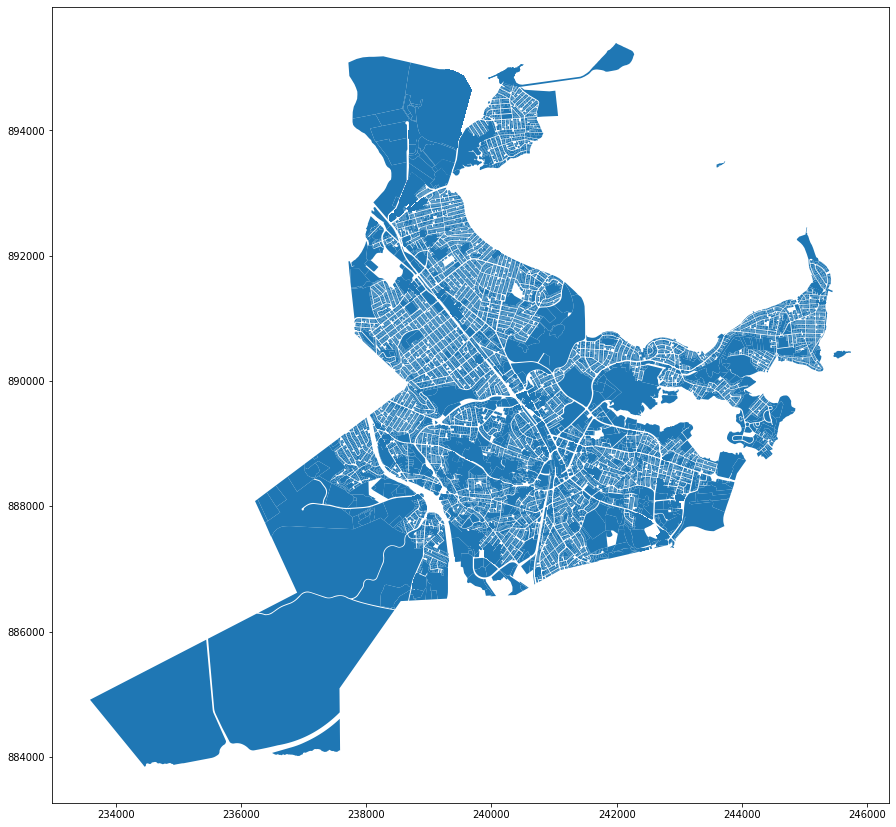

In [ ]:

f,ax = plt.subplots(1, figsize = (15,15))
ax = quincy_parcels.plot(ax = ax)
plt.show()

In [ ]:
newQuincy = gpd.sjoin(quincy_addresses, quincy_parcels_drop[['LOC_ID', 'geometry']], how='left', op='within')
newQuincy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:26986
Right CRS: None

  """Entry point for launching an IPython kernel.


,CENTROID_ID,FULL_NUMBER_STANDARDIZED,ADDRESS_NUMBER_PREFIX,ADDRESS_NUMBER,ADDRESS_NUMBER_SUFFIX,ADDRESS_NUMBER_2_PREFIX,ADDRESS_NUMBER_2,ADDRESS_NUMBER_2_SUFFIX,STREET_NAME,FLOOR,UNIT,MASTER_ADDRESS_ID,STREET_NAME_ID,REL_LOC,SITE_ID,BUILDING_NAME,GEOGRAPHIC_TOWN_ID,COMMUNITY_ID,COMMUNITY_NAME,GEOGRAPHIC_TOWN,POSTCODE,PC_NAME,COUNTY,STATE,geometry,index_right,LOC_ID
2065620,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,407,4049169,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775),1159314.0,F_783485_2908814
2065621,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,203,4048730,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775),1159314.0,F_783485_2908814
2065622,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,308,4049154,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775),1159314.0,F_783485_2908814
2065623,M_238755_886610,816,None,816.0,None,None,NaN,None,WILLARD STREET,None,410,4049172,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238754.959 886609.775),1159314.0,F_783485_2908814
2065646,M_238821_886625,826,None,826.0,None,None,NaN,None,WILLARD STREET,None,420,4049724,180545,None,7035.0,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (238821.324 886625.242),1159314.0,F_783485_2908814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325425,M_240360_894698,4,None,4.0,None,None,NaN,None,STANDISH ROAD,None,None,4018500,180418,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240359.890 894697.594),1502601.0,F_788609_2935357
2327432,M_240264_894802,16,None,16.0,None,None,NaN,None,MOON ISLAND ROAD,None,None,4016457,179445,None,NaN,STEP ONE EARLY INTERVENTION PROGRAM,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240263.999 894802.252),331553.0,F_788269_2935938
2328705,M_240384_894699,24,None,24.0,None,None,NaN,None,SHEPARD STREET,None,None,4014952,180385,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240384.318 894698.903),2241393.0,F_788661_2935358
2328719,M_240174_894716,151,None,151.0,None,None,NaN,None,DORCHESTER STREET,None,None,4016641,179760,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240173.761 894715.681),NaN,NaN


In [ ]:
density_ = newQuincy.groupby(['LOC_ID']).count()
density_

,CENTROID_ID,FULL_NUMBER_STANDARDIZED,ADDRESS_NUMBER_PREFIX,ADDRESS_NUMBER,ADDRESS_NUMBER_SUFFIX,ADDRESS_NUMBER_2_PREFIX,ADDRESS_NUMBER_2,ADDRESS_NUMBER_2_SUFFIX,STREET_NAME,FLOOR,UNIT,MASTER_ADDRESS_ID,STREET_NAME_ID,REL_LOC,SITE_ID,BUILDING_NAME,GEOGRAPHIC_TOWN_ID,COMMUNITY_ID,COMMUNITY_NAME,GEOGRAPHIC_TOWN,POSTCODE,PC_NAME,COUNTY,STATE,geometry,index_right
LOC_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
F_776785_2904919,2,2,0,2,0,0,0,0,2,0,0,2,2,0,0,0,2,2,2,2,2,2,2,2,2,2
F_777855_2912875,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
F_778027_2915235,2,2,0,2,0,0,0,0,2,0,0,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2
F_778524_2915368,1,1,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
F_778769_2913492,2,2,0,2,0,0,0,0,2,0,0,2,2,0,0,0,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_805093_2925372,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
F_805102_2925183,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
F_805103_2925125,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1


In [ ]:
density_['ADDRESS_NUMBER'].sum()

54058

In [ ]:
print('number of parcels in Quincy:%d.'%len(quincy_parcels))
print('number of addresses in Quincy:%d.'%len(quincy_addresses))

number of parcels in Quincy:26537.
number of addresses in Quincy:56431.


In [ ]:
newQuincy[newQuincy['LOC_ID'].apply(type) != str]

,CENTROID_ID,FULL_NUMBER_STANDARDIZED,ADDRESS_NUMBER_PREFIX,ADDRESS_NUMBER,ADDRESS_NUMBER_SUFFIX,ADDRESS_NUMBER_2_PREFIX,ADDRESS_NUMBER_2,ADDRESS_NUMBER_2_SUFFIX,STREET_NAME,FLOOR,UNIT,MASTER_ADDRESS_ID,STREET_NAME_ID,REL_LOC,SITE_ID,BUILDING_NAME,GEOGRAPHIC_TOWN_ID,COMMUNITY_ID,COMMUNITY_NAME,GEOGRAPHIC_TOWN,POSTCODE,PC_NAME,COUNTY,STATE,geometry,index_right,LOC_ID
2068774,M_239786_886642,1,None,1.0,None,None,NaN,None,MARRIOTT DRIVE,None,None,4024977,179397,None,NaN,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (239785.803 886641.541),NaN,NaN
2068775,M_239786_886642,1000,None,1000.0,None,None,NaN,None,MARRIOTT DRIVE,None,None,4024071,179397,None,NaN,None,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (239785.803 886641.541),NaN,NaN
2069359,M_240139_886624,1,None,1.0,None,None,NaN,None,CROWN DRIVE,None,None,4462440,193186,None,NaN,1,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (240138.875 886624.464),NaN,NaN
2070376,M_240097_886698,4,None,4.0,None,None,NaN,None,CROWN DRIVE,None,None,4462308,193186,None,NaN,4,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (240097.387 886698.253),NaN,NaN
2070383,M_240252_886699,5,None,5.0,None,None,NaN,None,CROWN DRIVE,None,None,4462438,193186,None,NaN,5,243.0,261,QUINCY,QUINCY,02169,QUINCY,NORFOLK,MA,POINT (240252.468 886698.644),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302287,M_240590_893987,14,None,14.0,None,None,NaN,None,BAY STREET,None,None,4008728,179571,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240590.072 893986.903),NaN,NaN
2303272,M_240184_894025,124,None,124.0,None,None,NaN,None,MAYFLOWER ROAD,None,None,4011880,179409,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240183.723 894025.297),NaN,NaN
2303273,M_240184_894025,124,None,124.0,None,None,NaN,None,MAYFLOWER ROAD,None,1,4037374,179409,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240183.723 894025.297),NaN,NaN
2303687,M_240737_894042,46,None,46.0,None,None,NaN,None,HARBOR VIEW STREET,None,None,4007191,180118,None,NaN,None,243.0,261,QUINCY,QUINCY,02171,QUINCY,NORFOLK,MA,POINT (240737.247 894042.316),NaN,NaN


In [ ]:
density_['CENTROID_ID'].nlargest(100)

LOC_ID
F_784058_2934173    497
F_796275_2913896    443
F_797031_2917248    410
F_786158_2912344    348
F_793591_2917319    322
                   ... 
F_783797_2927633     50
F_785786_2915821     50
F_793150_2920298     49
F_801052_2917985     49
F_793905_2916495     47
Name: CENTROID_ID, Length: 100, dtype: int64

In [ ]:
density_['CENTROID_ID'].rename('building_count')

LOC_ID
F_776785_2904919    2
F_777855_2912875    1
F_778027_2915235    2
F_778524_2915368    1
F_778769_2913492    2
                   ..
F_805093_2925372    1
F_805102_2925183    1
F_805103_2925125    1
F_805105_2925239    1
F_805145_2925305    1
Name: building_count, Length: 19837, dtype: int64

In [ ]:
quincy_parcels_density = pd.merge(quincy_parcels, density_['CENTROID_ID'].rename('building_count'), how = 'left', left_on='LOC_ID', right_on='LOC_ID')

In [ ]:
quincy_parcels_density['building_count'] = quincy_parcels_density['building_count'].mask(quincy_parcels_density['building_count'].isnull(), 0)

In [ ]:
quincy_parcels_density

,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,TOWN_ID,PROP_ID,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,CITY,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,NUM_ROOMS,LOT_UNITS,STORIES,SHAPE_AREA,SHAPE_LEN,geometry,building_count
0,5152-3-31,F_783249_2921137,FEE,5152,ASSESS,None,20110601,None,N,243,5152_3_31,392700,280600,17200,690500,2020,0.160354,20161012,609000,1040,121 PINE ST,121,PINE ST,None,QUINCY,02171,SIEGMANN GLENN C,19 MAPLE ST,NORFOLK,MA,02056,None,34555,0060,None,RES A,1925,3848,0,2384,2 Fam Flat,12,Acres,2,656.140769,112.016923,"POLYGON ((238755.213 890370.282, 238735.706 89...",3.0
1,2040-21-67,F_793477_2916121,FEE,2040,ASSESS,None,20110601,None,N,243,2040_21_67,26600,136500,2500,165600,2020,0.094467,20060425,0,3320,13 LANCASTER ST,13,LANCASTER ST,None,QUINCY,02171,LANCASTER LLC,15 LANCASTER ST,QUINCY,MA,02169,None,23604,0590,None,RES B,1940,792,0,792,Warehouse,0,Acres,1,388.493215,80.843681,"POLYGON ((241865.666 888840.945, 241851.359 88...",1.0
2,1044-22-2,F_803778_2922018,FEE,1044,ASSESS,None,20110601,None,N,243,1044_22_2,118700,170100,0,288800,2020,0.127158,20151215,289900,1010,103 ROCK ISLAND RD,103,ROCK ISLAND RD,None,QUINCY,02171,ONOFRIO SARAH,103 ROCK ISLAND RD,QUINCY,MA,02169,None,33719,0389,None,RES A,1907,1876,0,952,Bungalow,5,Acres,1,530.290255,97.544739,"POLYGON ((244976.727 890623.038, 244974.822 89...",1.0
3,6080Z-23-109,F_787572_2932808,FEE,6080,ASSESS,None,20110601,None,N,243,6080Z_23_109,336400,307900,5600,649900,2020,0.175620,20120601,0,1010,11 ABERDEEN RD,11,ABERDEEN RD,None,QUINCY,02171,AYERS CHARLES W,11 ABERDEEN RD,QUINCY,MA,02171,None,1254,0200,None,RESA,1953,3311,0,2188,Colonial,8,Acres,2,714.122257,106.982471,"POLYGON ((240044.514 893904.538, 240044.467 89...",1.0
4,6033-23-63,F_784341_2926274,FEE,6033,ASSESS,None,20110601,None,N,243,6033_23_63,381300,251000,5400,637700,2020,0.114784,20131021,500000,1040,215 NEWBURY AVE,215,NEWBURY AVE,None,QUINCY,02171,ZOU JIN XIN,215 NEWBURY AVE,QUINCY,MA,02171,None,31837,0154,None,RES B,1925,4091,0,2280,2 Fam Flat,10,Acres,2,454.815895,90.269524,"POLYGON ((239084.569 891932.538, 239060.033 89...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26532,None,F_783389_2926662,TAX,6041,ASSESS,None,20110601,None,N,243,6041_57_3,392700,464900,12400,870000,2020,0.429293,19680409,0,934C,12 HUNT ST,12,HUNT ST,None,QUINCY,02171,QUINCY CITY OF,1305 HANCOCK ST,QUINCY,MA,02169,None,04753,0294,None,BUS B,1974,4531,0,4499,Clubs/Lodges,3,Acres,1,1704.850478,174.103519,"POLYGON ((238797.104 892027.254, 238788.437 89...",1.0
26533,1187-17-2,F_787810_2916458,FEE,1187,ASSESS,None,20110601,None,N,243,1187_17_2,439400,191400,0,630800,2020,0.119353,20170123,0,1040,131 WHITWELL ST,131,WHITWELL ST,None,QUINCY,02171,STAFFORD DANIEL,131 WHITWELL ST,QUINCY,MA,02169,None,34862,0173,None,RES B,1902,4759,0,2738,2 Fam Flat,8,Acres,2.5,455.248202,88.004117,"POLYGON ((240129.845 888922.555, 240114.224 88...",4.0
26534,None,F_791233_2916034,TAX,1142,ASSESS,None,20110601,None,N,243,1142_35_A,1957700,283500,613700,2854900,2020,0.181772,19971022,1275000,3400,15 COTTAGE AVE,15,COTTAGE AVE,None,QUINCY,02171,BRISBANE LLC,15-19 COTTAGE AVE,QUINCY,MA,02169,None,12045,0742,None,QCZD-15,1987,35352,0,31239,Office Bldg,10,Acres,5,759.783035,115.902150,"POLYGON ((241176.892 888803.607, 241170.701 88...",9.0
26535,6081A-23-D,F_789080_2932805,FEE,6081,ASSESS,None,20110601,None,N,243,6081A_23_D,181800,285500,0,467300,2020,0.141414,20060501,0,1010,237 BELLEVUE RD,237,BELLEVUE RD,None,QUINCY,02171,LYNCH BARBARA A,101 ABERDEEM RD,QUINCY,MA,02171,None,1100,0977,None,RES A,1950,2420,0,1344,Cape Cod,6,Acres,1.75,561.127703,98.068155,"POLYGON ((240496.977 893914.199, 240496.025 89...

## PROCESS SATE WIDE DATA

In [ ]:
state_wide_parcels.groupby(['CITY']).count()

,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,TOWN_ID,PROP_ID,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,NUM_ROOMS,LOT_UNITS,STORIES,SHAPE_AREA,SHAPE_LEN,geometry
CITY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABINGTON,5045,5649,5649,5617,5649,0,5649,0,5649,5649,5617,5649,5649,5649,5649,5649,5649,5580,5649,5617,5617,5326,5617,269,506,5611,5608,5610,5610,5610,1451,5574,5581,0,5542,5649,5649,5649,5649,5617,5649,5617,5617,5649,5649,5649
ACTON,8921,8921,8921,8921,8921,980,8921,0,8921,8921,8858,8921,8921,8921,8921,8921,8921,8767,8921,8858,8858,8800,8858,0,632,8853,8772,8773,8773,8773,2532,8805,8847,0,8533,8921,8921,8921,8921,8858,8921,8858,8858,8921,8921,8921
ACUSHNET,4124,4424,4424,4419,4424,0,4424,187,4424,4424,4401,4424,4424,4424,4424,4424,4424,4398,4424,4401,4401,4401,4401,0,4401,4401,4401,4400,4400,4400,0,4393,4392,0,0,4424,4424,4424,4424,3656,4424,4401,3642,4424,4424,4424
ADAMS,3516,3517,3517,3515,3517,0,3517,1,3517,3517,3455,3517,3517,3517,3517,3517,3517,3385,3517,3455,3455,3455,3455,94,3455,3455,3453,3455,3454,3454,0,3348,3348,77,3455,3517,3517,3517,3517,2724,3517,3455,2724,3517,3517,3517
AGAWAM,10945,10945,10945,10944,10945,0,10945,1,10945,10945,10936,10945,10945,10945,10945,10945,10945,10853,10945,10936,10936,10936,10936,199,10936,10865,10865,10865,10861,10860,4,10303,10300,0,10751,10945,10945,10945,10945,9970,10945,10936,9968,10945,10945,10945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOBURN,12846,12846,12846,12845,12846,109,12846,0,12846,12846,12790,12846,12846,12846,12846,12846,12846,12470,12846,12790,12790,12121,12790,1942,1104,12470,12470,12470,12470,12470,8311,12535,12552,0,11499,12846,12846,12846,12846,12790,12846,12790,12790,12846,12846,12846
WORCESTER,44912,44913,44913,39810,44913,3054,44913,0,44913,44913,44862,44913,44913,44913,44913,44913,44913,44860,44913,44862,44862,44683,44862,4885,31684,44859,44855,44860,44860,44860,5,43965,44353,0,40047,44913,44913,44913,44913,44856,44913,44862,44862,44913,44913,44913
WORTHINGTON,730,834,834,832,834,0,834,0,834,834,816,834,834,834,834,834,834,721,834,816,816,816,816,0,793,816,816,816,816,814,0,546,546,0,0,834,834,834,834,590,834,816,590,834,834,834


In [ ]:
allcities = state_wide_parcels.groupby(['CITY']).count().index

In [ ]:
def process_city(cityname, state_wide_address, state_wide_parcels):
  
  city_addresses = state_wide_address[state_wide_address['COMMUNITY_NAME'] == cityname]
  city_parcels = state_wide_parcels[state_wide_parcels['CITY'] == cityname]
  city_parcels_drop = city_parcels.drop_duplicates(subset=['LOC_ID'])
  newcity = gpd.sjoin(city_addresses, city_parcels_drop[['LOC_ID', 'geometry']], how='left', op='within')
  city_parcels_density = pd.merge(city_parcels, newcity.groupby(['LOC_ID']).count()['CENTROID_ID'].rename('building_count'), how = 'left', left_on='LOC_ID', right_on='LOC_ID')
  city_parcels_density['building_count'] = city_parcels_density['building_count'].mask(city_parcels_density['building_count'].isnull(), 0)

  return city_parcels_density

In [ ]:
NORTH_READING_density = process_city('NORTH READING', state_wide_address, state_wide_parcels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:26986
Right CRS: None

  


In [ ]:
state_parcels_drop = state_wide_parcels.drop_duplicates(subset=['LOC_ID'])
newstate = gpd.sjoin(state_wide_address, state_parcels_drop[['LOC_ID', 'geometry']], how='left', op='within')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:26986
Right CRS: None

  


In [ ]:
state_parcels_density = pd.merge(state_wide_parcels, newstate.groupby(['LOC_ID']).count()['CENTROID_ID'].rename('building_count'), how = 'left', left_on='LOC_ID', right_on='LOC_ID')
state_parcels_density['building_count'] = state_parcels_density['building_count'].mask(state_parcels_density['building_count'].isnull(), 0)


In [ ]:
state_parcels_density

,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,TOWN_ID,PROP_ID,BLDG_VAL,LAND_VAL,OTHER_VAL,TOTAL_VAL,FY,LOT_SIZE,LS_DATE,LS_PRICE,USE_CODE,SITE_ADDR,ADDR_NUM,FULL_STR,LOCATION,CITY,ZIP,OWNER1,OWN_ADDR,OWN_CITY,OWN_STATE,OWN_ZIP,OWN_CO,LS_BOOK,LS_PAGE,REG_ID,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,NUM_ROOMS,LOT_UNITS,STORIES,SHAPE_AREA,SHAPE_LEN,geometry,building_count
0,22-A-14,F_540953_2881154,FEE,22,ASSESS,22.tif,20120221,None,N,54,22-A-14,78600,64800,8000,151400,2021,0.6300,20170706,190900,101,10 HAMMOND HILL RD,10,HAMMOND HILL RD,None,CHARLTON,01507,GASPAR MARISA R (7/17),10 HAMMOND HILL RD,CHARLTON,MA,01507,None,57376,142,None,None,1940,1080,1,1080,BUNGALOW,6,Acres,1,2537.960450,228.095853,"POLYGON ((164922.309 878186.641, 164855.848 87...",1.0
1,P-12_7_3_0,F_713619_2853605,FEE,P-12,ASSESS,None,20161109,None,N,350,P-12_7_3_0,594000,231700,6600,832300,2020,1.0000,20170427,1,1010,30 WISTERIA WAY,30,WISTERIA WAY,None,WRENTHAM,02093,GEUSS MARK & KRISTEN TRUSTEES,30 WISTERIA WAY,WRENTHAM,MA,02093,None,35064,282,None,02,2000,7620,0,4152,Colonial,10,Acres,2,4067.394252,282.890966,"POLYGON ((217537.914 869802.140, 217538.324 86...",1.0
2,41-7-35,F_384272_2844788,FEE,41,OTHER,None,20121220,None,N,85,41-7-35,554300,162800,0,717100,2019,0.9800,20090622,1,101,152 OLD FARM RD,152,OLD FARM RD,None,EAST LONGMEADOW,01028,CAPACCIO LUIGI + IMMACOLATA CO TR,152 OLD FARM RD,EAST LONGMEADOW,MA,01028,None,17853,306,None,RAA,1996,0,0,4441,COLONIAL,0,Acres,2,4087.382528,259.474004,"POLYGON ((117170.468 867084.617, 117146.410 86...",1.0
3,43_41,M_243615_874590,FEE,43,ASSESS,None,20120531,None,N,1,43_41,176000,164900,2100,343000,2021,0.5396,19821224,69900,1010,60 LOGANBERRY DR,60,LOGANBERRY DR,None,ABINGTON,None,WILLIAMS EDWARD & MARY,60 LOGANBERRY DR,ABINGTON,MA,02351,USA,216322,LD,None,R40,1968,2694,0,1660,Raised Ranch,7,Acres,1,2079.899544,254.946557,"POLYGON ((243671.656 874572.000, 243661.297 87...",1.0
4,K10 13 2,F_353486_2851897,FEE,K10,ASSESS,None,20120120,None,N,5,K10 13 2,315800,57200,7600,380600,2020,0.2500,19250418,0,903,733 MAIN ST,733,MAIN ST,None,AGAWAM,01001,TOWN OF AGAWAM,36 MAIN ST,AGAWAM,MA,01001-1837,None,1268,494,None,RA2,1924,2194,1,2194,LIBRARY,0,Acres,1,1760.297070,170.111702,"POLYGON ((107768.000 869277.188, 107765.680 86...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410189,006-000-061-001,F_877781_2818022,FEE,006,ASSESS,None,20120503,None,N,239,006-000-061-001C,319500,0,0,319500,2020,0.0000,20140606,0,102,32 HEDGE RD,32,HEDGE RD,C,PLYMOUTH,02360,NAN BUTTERFIELD FAMILY REV TR,32 HEDGE RD UNIT C,PLYMOUTH,MA,02360,None,44392,266,None,R20M,2003,2330,1,2330,TnHs,6,Acres,2.7,3906.290481,262.259389,"POLYGON ((267605.715 858936.195, 267585.522 85...",9.0
2410190,G14 2 4,F_343071_2858631,FEE,G14,ASSESS,None,20120120,None,N,5,G14 2 4,199700,83200,1100,284000,2020,0.7300,20031007,253000,101,76 JAMES ST,76,JAMES ST,None,AGAWAM,01001,RIGALI PETER,76 JAMES ST,FEEDING HILLS,MA,01030-1412,None,13660,89,None,AG,1969,2205,1,2205,RANCH,8,Acres,2,3053.577787,231.818506,"POLYGON ((104613.414 871309.375, 104544.328 87...",1.0
2410191,F10 3 5,F_341209_2852760,FEE,F10,ASSESS,None,20120120,None,N,5,F10 3 5,137700,76700,500,214900,2020,0.2300,19770923,0,101,39 HENRY ST,39,HENRY ST,None,AGAWAM,01030,WHITEHEAD WALLACE A JR,39 HENRY ST,FEEDING HILLS,MA,01030-2203,None,None,None,None,BA,1955,1648,1,1648,CAPE,6,Acres,1,935.295352,122.372578,"POLYGON ((103984.086 869536.813, 104015.172 86...",1.0
2410192,G14 2 8,F_343521_2857979,FEE,G14,ASSESS,None,20120120,None,N,5,G14 2 8,74500,77300,9300,161100,2020,0.5900,19801112,0,101,288 NORTH ST,288,NORTH ST,None,AGAWAM,01030,JEAN RONALD G,288 NORTH ST,FEEDING HILLS,MA,01030-1320,None,5024,392,None,RA2,1902,1056,1,1056,OLD STYLE,6,Acres,2,2288.311659,204.393414,"POLYGON ((104673.516 871136.625, 104703.531 87...",1.0
